In [29]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
os.listdir 

<function nt.listdir(path=None)>

In [4]:
basedir = os.getcwd()
datadir = basedir + '/Data'

print (basedir)
print(datadir)

C:\Users\19197\Documents\GitHub\AI4ALL
C:\Users\19197\Documents\GitHub\AI4ALL/Data


In [5]:
os.listdir(datadir)

['microbiome_data.csv', 'otu_annotation.csv', 'sample_desc_deid.csv']

In [6]:
m_d = pd.read_csv(datadir + '/microbiome_data.csv', index_col = 0)
otu_a = pd.read_csv(datadir  + '/otu_annotation.csv', index_col = 0)
s_d = pd.read_csv(datadir + '/sample_desc_deid.csv', index_col = 0 )

In [7]:
m_d.columns

Index(['1001360178', '1000106028', '1000160068', '1001406208', '1000606198',
       '1000105048', '1000603178', '1000601248', '1000860248', '1000101018',
       ...
       '1005503278.rs', '1004302338.rs', '1900701418.rs', '1004704138.rs',
       '1004602368.rs', 'NTC52', '1002101188.rs', '1000101168.rs', 'NTC51',
       '1002204158.rs'],
      dtype='object', length=4357)

In [14]:
s_d.columns

Index(['BarcodeSequence', 'LinkerPrimerSequence', 'BodySite', 'SubjectID',
       'GestDayColl', 'GestWeekColl', 'TrimColl', 'intra_ut_fetal_demise',
       'History_of_preterm_delivery', 'Withdrew', 'Gdwithdrawal',
       'GWwithdrawal', 'Delivered', 'GestDayDel', 'GestWeekdel',
       'Labor_Initiation', 'Indication', 'PPROM', 'Chorioamnionitis',
       'Endometritis', 'Hypertensive Disorder', 'Preeclampsia',
       'Birthweight_kg', 'Length_at_birth', 'Number_of_babies', 'Race',
       'Ethnicity', 'ReversePrimer', 'Saliva_volume_uL',
       'Note_any_concerns_regarding_the_specimen', 'Run_No',
       'Number_within_run', 'Bead_Beating_Time', 'Description'],
      dtype='object')

C:\Users\19197\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


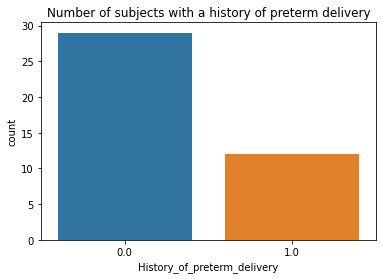

In [41]:
historyOfPreterm = s_d[['SubjectID','History_of_preterm_delivery']].drop_duplicates()
sns.countplot(historyOfPreterm['History_of_preterm_delivery'])

plt.title("Number of subjects with a history of preterm delivery")
plt.savefig(basedir + '/Figures/historyCount.png',bbox_inches = 'tight')

In [51]:
def gestWeekClassification(row):
    if row['GestWeekdel'] < 37:
        return "preterm"
    elif row["intra_ut_fetal_demise"] == 'T':
        return "fetal death"
    else: 
        return "normal"

s_d['pretermBirthOutcomes'] = s_d.apply(gestWeekClassification,axis=1)

C:\Users\19197\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


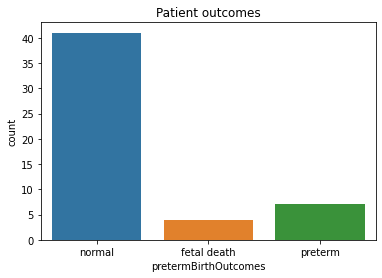

In [52]:
earlyDelivery = s_d[['SubjectID','pretermBirthOutcomes']].drop_duplicates()
sns.countplot(earlyDelivery['pretermBirthOutcomes'])

plt.title("Patient outcomes")
plt.savefig(basedir + '/Figures/earlyDeliveryCount.png',bbox_inches = 'tight')

In [ ]:
def gestWeekClassification(row):
    if row['GestWeekdel'] < 37:
        return "preterm"
    else: 
        return "normal"

s_d['pretermBirthOutcomes'] = s_d.apply(gestWeekClassification,axis=1)